# Unsupervised Learning

## Preliminary steps:
* Importing
* Setting up figure parameters

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import sklearn

In [ ]:
# setting some figure display paramaters
sns.set_context('notebook')
sns.set_style('white', {'axes.linewidth': 0.5})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['legend.edgecolor'] = 'w'

## Introduction

**What is Clustering?**<br>
Clustering is a collection of machine learning algorithms with the following task: assign to each data point one of a finite number of categories (or *clusters*) without knowing in advance what these clusters are.

Clustering is a type of *unsupervised learning*. That is to say, contrary to classification or regression, we have no access to ground truth (the response in regression, or labels in classification). Hence, we rely on a strong assumption:

**Unsupervise Learning Assumption**<br>
 Anything that can be learned from the data is present in the structure of the data itself.

**Clustering Assumption**<br>
In the case of clustering, the different categories/clusters, are assumed to be distinguishable, to some degree, purely from the data. This will become clear soon.

Usually, this assumption is justified either by exploratory analysis or by domain specific knowledge.

Here is an example of a dataset and the result of clustering:

(-0.5, 639.5, 479.5, -0.5)

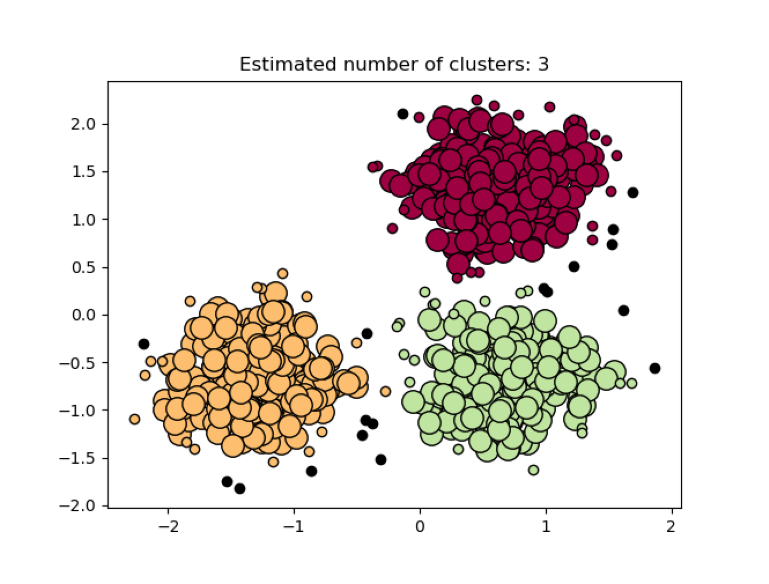

In [ ]:
# DON'T RUN if using Google Colab.
# If you are on google colab and it is not showing, go here: https://github.com/nuitrcs/scikit-learn-workshop/blob/main/images/clustered_blobs.png
img = mpimg.imread("../images/clustered_blobs.png")
plt.imshow(img)
plt.axis("off")

# Image taken from scikit learn's website.

## ML workflow steps for unsupervised models:

**Standard Steps**
1. State the problem
2. Gather the data
3. Pre-process the data
4. Start with one model
5. Train the model
6. Evaluate the model
7. Hyperparameter tuning
8. Iterate to choose the right model

**Possible steps**
* Reduce dimensionality
* Make predictions
* Split data
* Validate the model

## 1. State the Problem

**Case example**<br>
Imagine you are researching breast cancer. You have images of breast mass, and you wish to know if it is possible to distinguish between malignant and benign tissue judging by cell nucleus characteristics. Here is one such image:

(-0.5, 1533.5, 945.5, -0.5)

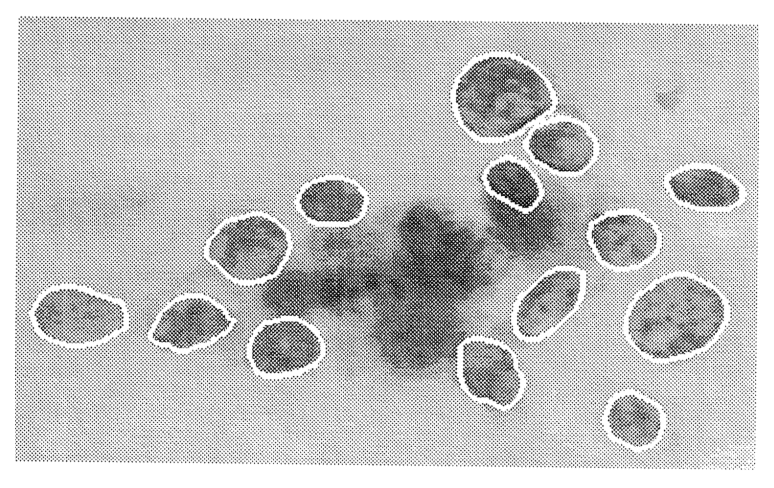

In [ ]:
# DON'T RUN if using Google Colab.
# If you are on google colab and it is not showing, go here: https://github.com/nuitrcs/scikit-learn-workshop/blob/main/images/breast-tissue.png
cell_img = mpimg.imread("../images/breast-tissue.png")
plt.imshow(cell_img)
plt.axis("off")

## Image taken from Street et al. "Nuclear Feature Extraction for Breast Tumor Diagnosis", 1992.

**Extract Features**<br>
A computer vision tool allows you to extract features like radius, smoothness, degree of symmetry, etc. We will assume this step is done already. It is your task now to find the malignant and benign clusters based on these numerical features.

**Task:** Cluster cell nucleuses.

**Interpretation:**
The clusters indicate two groups: benign and malignant.

**Assumptions:**
There are only two clusters (benign and malignant) recognizable in the data.

## 2. Gather the data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nuitrcs/scikit-learn-workshop/main/data/breast_cancer_wisconsin_clustering.csv')
# df = pd.read_csv('../data/breast_cancer_wisconsin_clustering.csv') # <-- If working locally
df.shape

We have 569 samples and 10 features. These are our features:

In [ ]:
df.columns

Let's take a quick look at the first few rows:

In [ ]:
df.head()

**Note:** Contrary to the case of supervised learning (regression and classification), we DON'T have a target column! This will be the standard for clustering problems.

Occasionally you may have access to true labels, but these are exceptions.

## 2.B Explore the data

**Assumption**<br>
Remember our big assumption: clusters are identifiable from the structure of the data.

**Dimensionality**<br>
Each point in the data is a 10-dimensional vector. We can't visualize 10-dimensional points. So let's look at their pairwise relationships and see if we can make up some clusters:

In [ ]:
# This takes a while if in Google Colab. ONLY run if not showing already.
sns.pairplot(df)
plt.show()

Well well, not as clean as we wished. But remember we are only looking at 2-d slices of a 10-d object. Indeed, if we take a closer look at area and smoothness, we start seeing some separation:

In [ ]:
plt.scatter(df["area"], df["smoothness"])
plt.show()

**Separation?**<br>
It is faint, but there seems to be a separation around the 800 area value. Let's go a step further and throw in concave points. 3D scatter plots are a bit difficult to see, but we can take a look from a few different angles:

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12), subplot_kw={'projection': '3d'})
elevation_angles = [0, 30, 90]
azimuth_angles = [-90, 90, 180]
for ax, (el,az) in zip(axs.flat, [(x,y) for x in elevation_angles for y in azimuth_angles]):
  ax.scatter(df["area"], df["smoothness"], df["concave points"], alpha = .2)
  ax.view_init(elev=el, azim=az)
plt.show()

**Pulling clusters in different directions**<br>
We can see that as we add dimensions the separation becomes clearer. Let's take this as an indication that we'll be able to perform clustering to some degree of success.

## EXERCISE 1

* Get the Iris dataset, which contains the sepal and petal length and width or three different plant species of the Iris genus.

* Drop the label and assume we don't have knowledge of it.

* Plot it in 3d, pick any 3 of the 4 features you want.

* Also plot the pairwise scatterplots.

* Does it look like it will be easy to cluster it?

(-0.5, 1993.5, 773.5, -0.5)

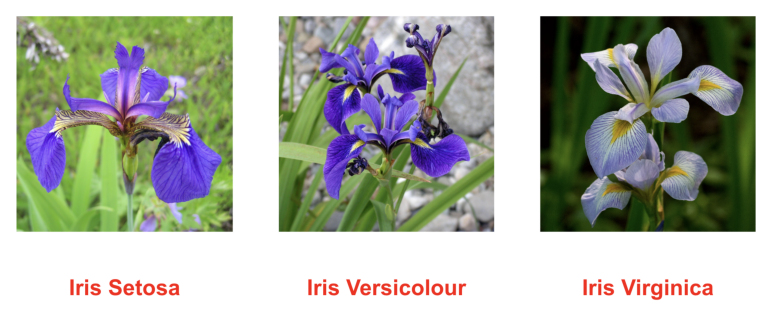

In [ ]:
# DON'T RUN if using Google Colab
# If you are on google colab and it is not showing, go here: https://github.com/nuitrcs/scikit-learn-workshop/blob/main/images/iris.png
cell_img = mpimg.imread("../images/iris.png")
plt.imshow(cell_img)
plt.axis("off")

## Images taken from the wikipedia page for each flower.

In [ ]:
# I'll do step 1 and 2 for you:
from sklearn import datasets

# Get iris dataset using sklearn
iris = datasets.load_iris(as_frame = True)
iris = iris.data

# (Optional) If the above doesn't work, get the iris dataset directly from our github repo:
# iris = pd.read_csv("https://raw.githubusercontent.com/nuitrcs/scikit-learn-workshop/main/data/iris_clustering.csv")


# Let's look at the data
iris.head()

In [ ]:
icols = iris.columns

In [ ]:
# I'll help with step 3:

fig = plt.figure()
ax = fig.add_subplot(projection = "3d", elev=15, azim=180)

ax.scatter() # <-- fill this in yourself
plt.show()

In [ ]:
# I'll do this step for you also.
sns.pairplot(iris)
plt.show()

## 3. Pre-process the data

**Continuous data**<br>
OK, it is time to pre-process the data. In our case all data is continuous, so we can use standardization, which you are familiar with.

**What if categorical data?**<br>
Dealing with categorical variables in clustering is not so straighforward. An easy hack is to use one-hot encoding as learned in previous sessions. However, the best practice is to use clustering algorithms specific for categorical and mixed data, for example k-modes.

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create Scaler object
scaler = StandardScaler()

# Scale the data

scaled_data = scaler.fit_transform(df)

Note that our scaler returned a numpy array:

In [ ]:
scaled_data[1:5,:]

## EXERCISE 2

Scale the iris dataset.

In [ ]:
iris_scaler =  # <-- Fill this out
iris_scaled =  # <-- Fill this out



## 4. Start with one model

**Different algorithms**<br>
This part is tricky, there are a few different types of clustering algorithms and they are based on different principles. Some clustering algorithms try to find clouds of high density, while others try to form clusters that are tight internally but separate from each other.

We will look at two common clustering algorithms: **k-means** and **DBSCAN**. Here is a plot from scikit-learn comparing different types of clustering algorithms.

**How to choose?**<br>
The important thing to know is that when the data is "curved" or has a weird geometry. Algorithms like DBSCAN perform better. But if your data is more blob-like, k-means is a good choice.

(-0.5, 2099.5, 1299.5, -0.5)

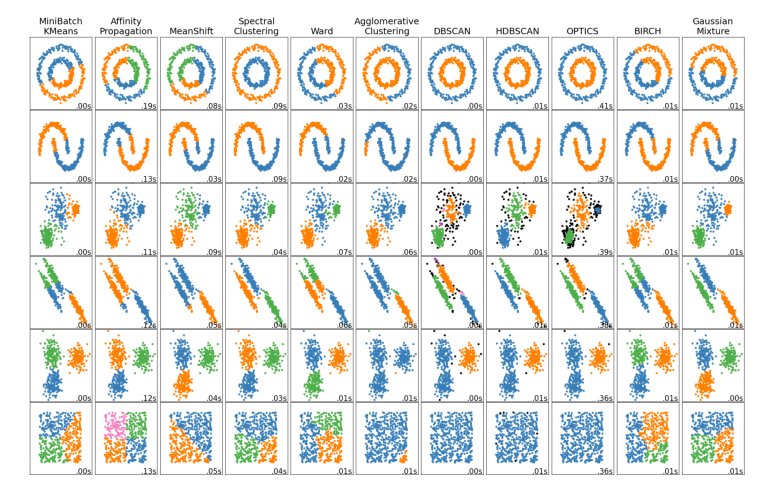

In [ ]:
# DON'T RUN if using Google Colab.
# If you are on google colab and it is not showing, go here: https://github.com/nuitrcs/scikit-learn-workshop/blob/main/images/clustering_comparison.png
img = mpimg.imread("../images/clustering_comparison.png")
plt.imshow(img)
plt.axis("off")

# Image taken from scikit learn's website.

## 5. Train the model: k-means

k-means produces the cluster assignments and also a "centroid" for each cluster.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_model = KMeans(n_clusters = 2)
kmeans_model.fit(scaled_data)

Mmm, OK so what is the output?

Remember, clustering assigns a cluster to each data point, so we should have an assignment to one of two clusters for each data point. Let's see:

In [ ]:
kmeans_model.labels_

In [ ]:
C = kmeans_model.cluster_centers_
C

Great! Let's do some sanity check, by plotting as above but with the labels:


In [ ]:
plt.scatter(scaled_data[:,3], scaled_data[:,4], c = kmeans_model.labels_)
plt.scatter(C[:,3],C[:,4], c = "red")
plt.show()

Indulge me in visualizing the 3d structure again, this time only the default angle:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(scaled_data[:,3], scaled_data[:,4], scaled_data[:,7], alpha = .5, c = kmeans_model.labels_)
ax.scatter(C[:,3], C[:,4], C[:,7], c = "red", alpha = 1)
ax.view_init(elev=30, azim=-120)
plt.show()

## EXERCISE 3

Run kmeans for the scaled iris dataset. Note we already know it contains 3 clusters. This is not common but it will be OK for us. Plot it in 2d and 3d (choose the columns you want) colored according to the cluster assignments.

In [ ]:
# Create a kmeans object
kmeans_iris = KMeans(n_clusters= 3) # <-- Fill this out

# Fit it to the data
                                   # <-- Fill this out

# Get the centroids
C_iris = kmeans_iris.cluster_centers_

In [ ]:
# 2d plot
plt.scatter(iris_scaled[:, 1], iris_scaled[:,2], c = kmeans_iris.labels_)
plt.scatter(C_iris[:,1],C_iris[:,2], c = "red")
plt.show()

In [ ]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter() # <-- fill this out
ax.scatter() # <-- fill this out
ax.view_init(elev=30, azim=-120)
plt.show()

## 6. Evaluate the model

**No ground truth**<br>
Model evaluation for unsupervised methods is quite tricky, since there is no truth to compare to. There are, however, some heuristics that help us find our footing.

**Inertia, or within-clusters sum of of squares**<br>
One way in which we can assess k-means effectiveness is through what is called *intertia* or within-clusters sum of squares. This quantity represents how packed together the points within each cluster are.

**Silhouette coefficient**<br>
Other metrics similarly try to identify how well defined clusters are in one way or another. The `metrics` module of sklearn has a few such indices. A popular option is the silhoutte coefficient.



In [ ]:
from sklearn import metrics
sc_score = metrics.silhouette_score(scaled_data, kmeans_model.labels_, metric='euclidean')
inertia = kmeans_model.inertia_

print(f"Silhhouette Coefficient: {sc_score} \n Intertia: {inertia}")

**Interpreting Silhouette**
The silhouette coefficient ranges from -1 to 1, 1 being the case where clusters are internally cohesive and well separated. This is not fail-safe, however, since some models may have better SC than others and still have the wrong number of clusters.

**Interpreting Inertia?**
Inertia by itself doesn't say much, since it is an absolute sum of squares and is not relative. However, it can be used to compare among models or hyperparameters (like number of clusters).

Indeed, this is where we are heading!

## 7. Hyperparamter selection

**How many clusters?**<br>
We used field knowledge to guess the number of clusters (2), but in general this is not known, or at least there is a degree of uncertainty. One way to see which number of clusters is best is to compute the inertia for different number of clusters. This will create an **elbow plot**. The inflection point, where the model does not improve much by adding complexity, is the chosen number.

Let's also plot the silhouette coefficient. Note that in this case larger is better.

In [ ]:
ev = []
sc = []
Kvals = np.arange(1,10)
for K in Kvals:
  m_K = KMeans(n_clusters = K)
  m_K.fit(scaled_data)
  ev.append(m_K.inertia_)
  if K >= 2:
    sc.append( metrics.silhouette_score(scaled_data, m_K.labels_, metric='euclidean') )

Plotting inertia's elbow plot. Inflection point is better.

In [ ]:
plt.plot(Kvals, ev)
plt.show()

Plotting Silhouette coefficient. Larger is better. 2 is the minimum possible.

In [ ]:
plt.plot(Kvals[1:], sc)
plt.show()

## EXERCISE 4

* Create an elbow plot for the iris dataset.
* At what value of K is there an inflection point?
* Is it straighforward to decide?

In [ ]:
ev = []
sc = []
Kvals = np.arange(1,10)
for K in Kvals:
  m_K = KMeans() # <-- Fill this in
  m_K.fit() # <-- Fill this in
  ev.append(m_K.inertia_)
  if K >= 2:
    sc.append( metrics.silhouette_score(iris_scaled, m_K.labels_, metric='euclidean') )

In [ ]:
plt.plot(Kvals, ev)
plt.show()

In [ ]:
plt.plot(Kvals[1:], sc)
plt.show()

# Conclusion

* Unsupervised learning does not have a ground truth to compare to.
* We must rely on domain knowledge and data structure.
* k-means and DBSCAN are popular clustering algorithms.
 * k-means scales well. Works for "blob" type of data. Depends heavily on chosen number of clusters.
 * DBSCAN is better suited for curved data. Depends on other parameters.
* You can choose the number of clusters using the elbow plot heuristic.
 * There are also other metrics indicating how well the data is clustered.
 * Unfortunately, in general there is no ground truth to compare to.

 Clustering is a very common machine learning task. Often, the number of clusters is "incorrect". This results in a few extra clusters of small size that in many cases can be ignored and are taken as a loss. The more domain knowledge you have, and the more you explore the data, the better!

# Optional steps

**Dimensionality Reduction**<br>
We didn't go over dimensionality reduction, but it is often used jointly with clustering. It can be done before or after clustering itself, depending on the geometry of the data. If the data is well separated, the dimension is high, and pairwise distances (which do not have to be Euclidean) are relatively easy to compute, dimensionality reduction is often done before clustering itself.

**Predict assignments for new data**<br>
Many clustering algorithms also have a `predict` method that allows you to assign a new data point to a cluster.

**Access to ground truth**<br>
Occasionally you will have access to true cluster assignments (almost like in classification). If you do, you can use these to test the model and quantify its error.

**Split the data**<br>
Notice we didn't split the data as in the supervised case. That's because we didn't need a test dataset. If you have access to true cluster assignments, you can split into train and test datasets as before! But...

**Don't use any labels for training**<br>
Contrary to the supervised case, besides splitting the data, you must remove completely the true labels and not use them for training case.

**Validate the model**<br>
Once training has been completed. You can use both the training labels to calculate a training error, and the testing data to calculate a testing error.



# Dimensionality Reduction

Dimensionality reduction is another unsupervised method that is not the same as clustering, but is often used in conjunction with it, if anything to visualize and interpret the clustering results.

We won't go into details. The intuition is that it maps your original data, which lives in high dimensions, to lower dimensions, while trying to preserve the original structure.

Two common dimensionality reduction methods are PCA (principal component analysis) and t-SNE. Let's try t-SNE:

In [ ]:
from sklearn.manifold import TSNE

low_data = TSNE(n_components = 2).fit_transform(scaled_data) # map to 2D


Let's visualize the transformed data:

In [ ]:
plt.scatter(low_data[:,0], low_data[:,1])
plt.show()

You can see that a lot of the structure has been lost! What would happen if we tried to cluster this?

In [ ]:
low_kmeans = KMeans(n_clusters=2).fit(low_data)
plt.scatter(low_data[:,0], low_data[:,1], c = low_kmeans.labels_)
plt.show()

In [ ]:
low_kmeans.labels_

In [ ]:
label_inversion = 0 # ONLY 1 if the labeling is inverted with respect to high dim model.
if label_inversion:
    labels = 1 - low_kmeans.labels_
else:
    labels = low_kmeans.labels_

In [ ]:
plt.scatter(df["area"], df["smoothness"], c = labels)
plt.show()

Let's see where the high-d model and the low-d model differ:

In [ ]:
diff_labels = kmeans_model.labels_ - labels
diff_labels

In [ ]:
plt.scatter(df["area"], df["smoothness"], c = diff_labels, cmap = "binary", edgecolors="k", linewidths = .1,alpha = .5)
plt.show()

On the other hand, we can look at the low-dimensional data but cluster according to the high-dimensinoal data:

In [ ]:
plt.scatter(low_data[:,0], low_data[:,1], c = kmeans_model.labels_)
plt.show()

The structure separating all those middle points was lost when we performed t-SNE, therefore our clustering result suffered.

## Dimensionality reduction with the iris dataset

The iris dataset has very nice separation, how do we fare in this case?

In [ ]:
low_iris = TSNE(n_components=2).fit_transform(iris_scaled)
plt.scatter(low_iris[:,0], low_iris[:,1])
plt.show()

In [ ]:
low_iris_km = KMeans(n_clusters=3).fit(low_iris)
fig, axs = plt.subplots(1,2)
axs[0].scatter(low_iris[:,0], low_iris[:,1], c = low_iris_km.labels_)
axs[1].scatter(low_iris[:,0], low_iris[:,1], c = kmeans_iris.labels_)
plt.show()